# Power Transformer

In [1]:
# for this you have to import PowerTransformer
# power transformer includes Box-Cox and Yeo-Johnson transformers

## Box-Cox & Yeo-Johnson

In [2]:
# using this you can converted ae given distribution into normal distribution
# here the values you will get will be btwn -1 and +1

# ONLY APPLICABLE ON THE NUMBRES WHICH ARE GREATER THEN 0
# as there is no guarentee that the will not contains any 0 or -ve integers, to solve this we have Yeo-Johnson transformer


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer          # to use both box cox and yeo johnson

In [3]:
df = pd.read_csv('concrete_data.csv')
print(df.shape)
df.head() 


(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
print(df.isnull().sum())
print("\n", df.describe())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

             Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean    

ACCURACY :  0.6369606518338298 

CROSS VALIDATION :  0.46099404916628683 



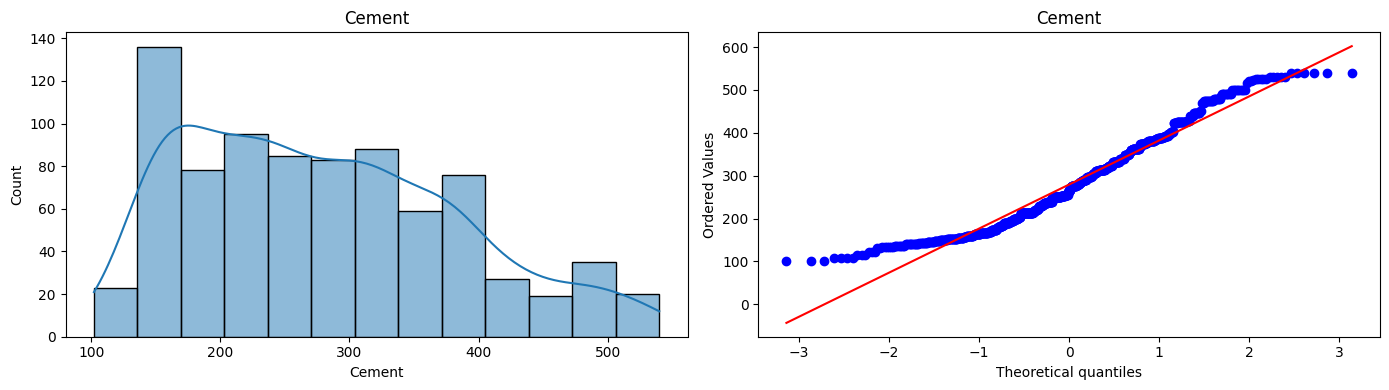

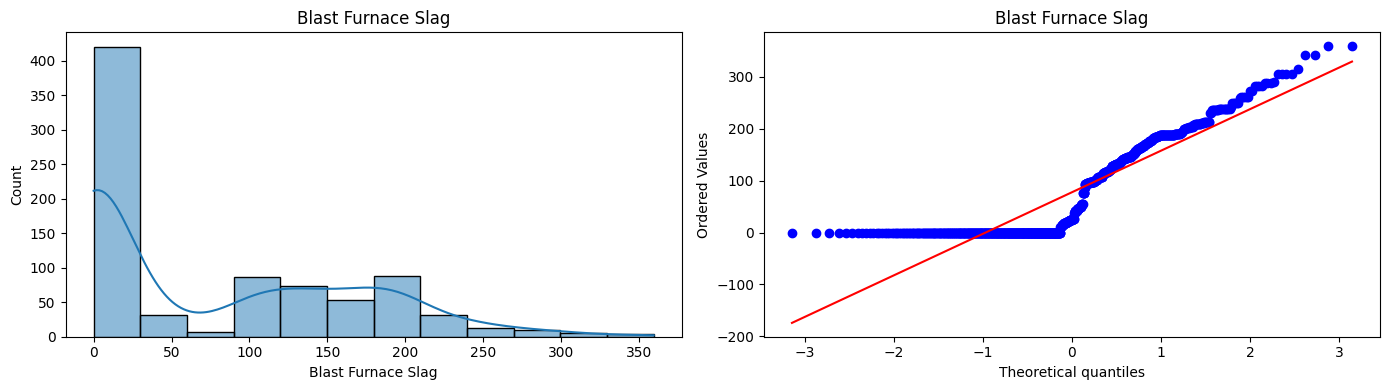

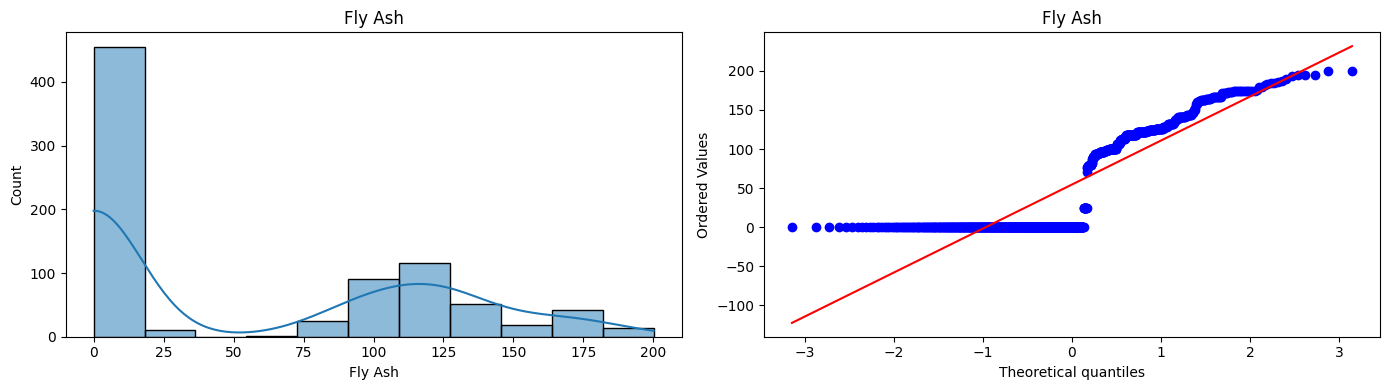

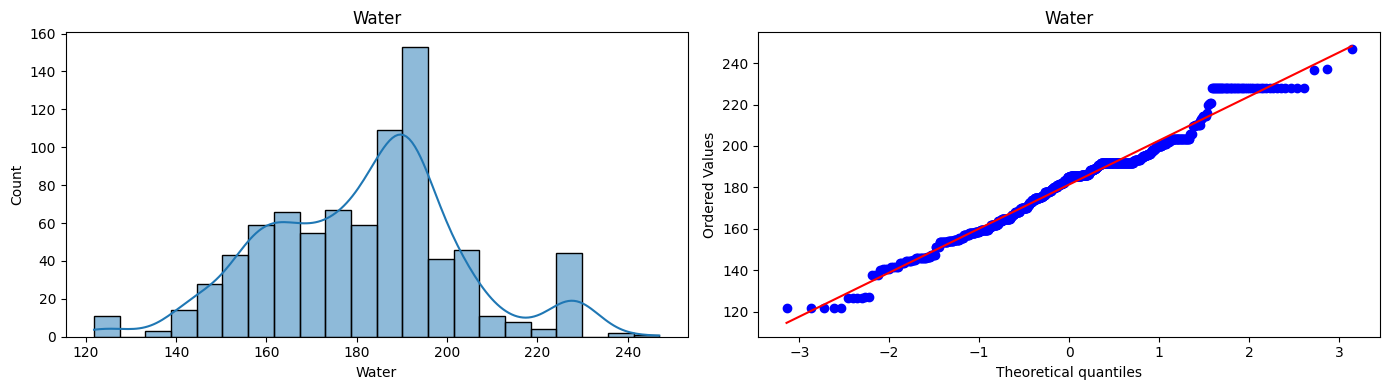

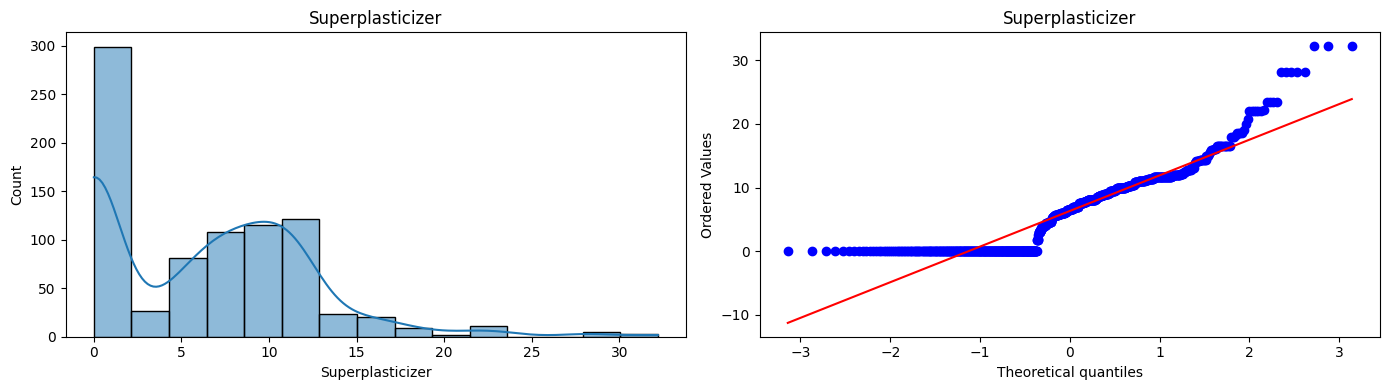

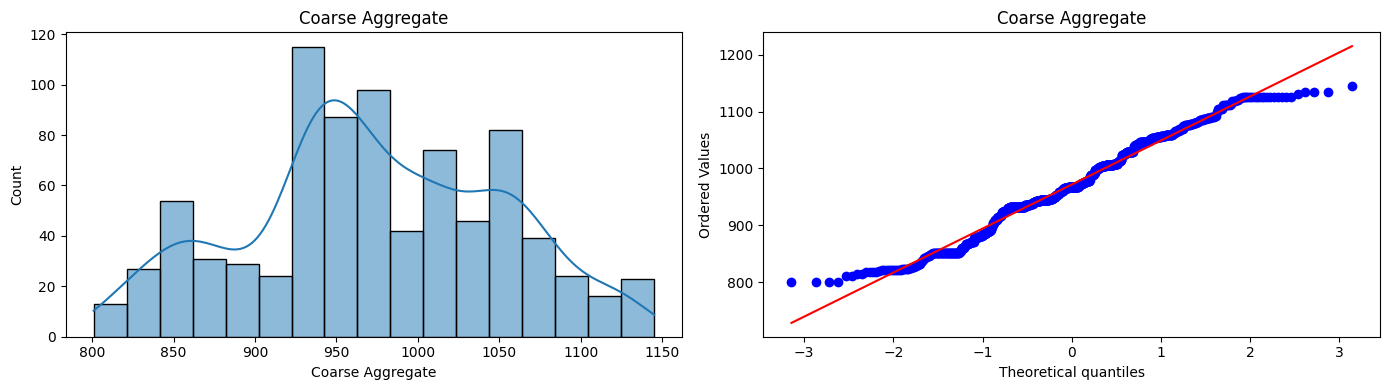

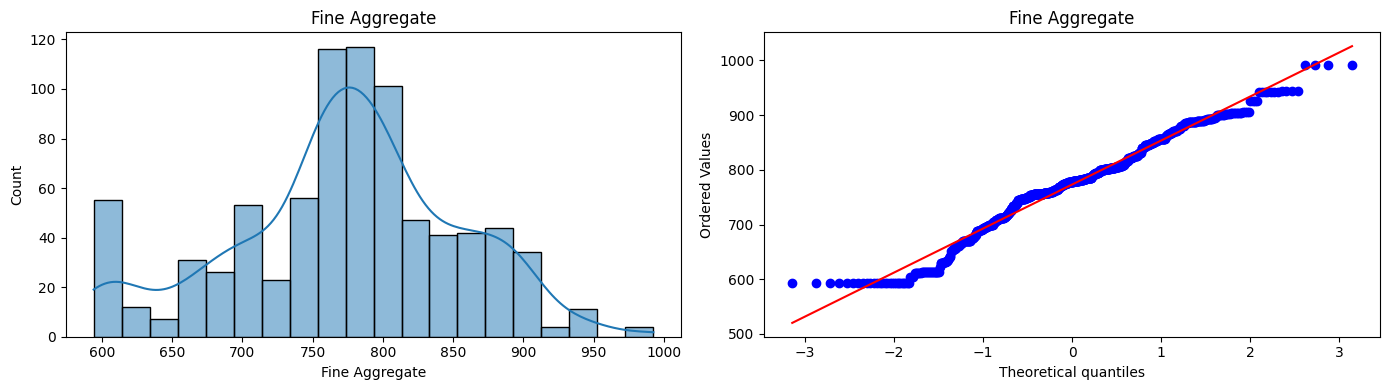

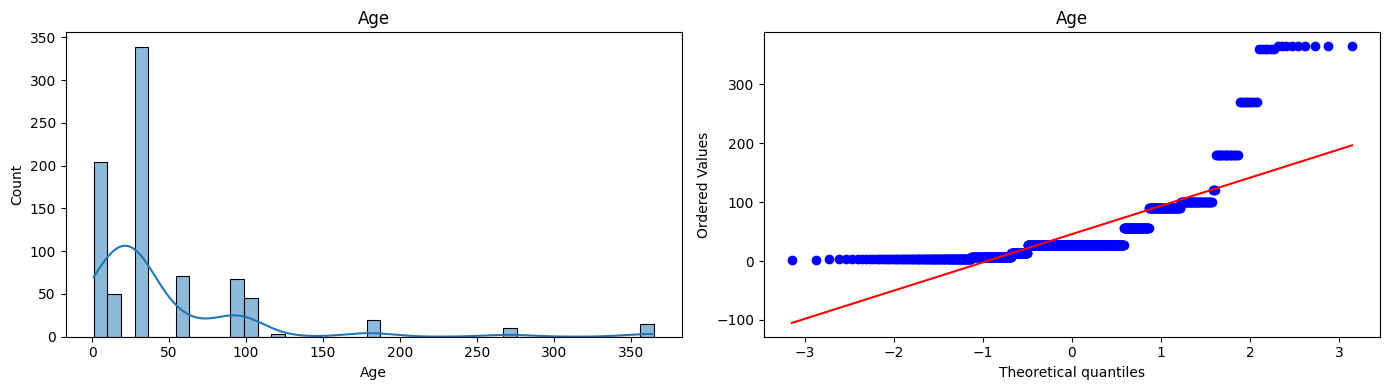

In [13]:
x = df.drop(columns=['Strength'])
y = df['Strength']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("ACCURACY : ", r2_score(y_test, y_pred), "\n")

# cross validation
print("CROSS VALIDATION : ", np.mean(cross_val_score(lr, x, y, cv=5, scoring='r2')), "\n")        # as we can see from the cross validataion the acutual accuracy is very low
# cv=5 means 5-fold cross-validation
# Train the model on 4 parts
# Test it on the remaining 1 part
# Repeat this process 5 times, each time using a different part for testing


# plotting distplot without any transformations
for i in x_train.columns:
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    sns.histplot(x_train[i], kde=True)
    plt.title(i)

    plt.subplot(122)
    stats.probplot(x_train[i], dist='norm', plot=plt)
    plt.title(i)

    plt.tight_layout()
    plt.show()




